In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes

In [2]:
!pip install kmodes

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# !pip install kmodes

In [5]:
# taking long time for exec, preserve df
df_original = pd.read_excel('Online Retail.xlsx')

In [6]:
df = df_original.copy()

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
#df_original["StockCode"].isin(["85123A"])

In [9]:
#len(df_original[df_original["StockCode"].isin(["85123A "])])

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
df.duplicated().any()
# handle duplicates

True

In [13]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [14]:
dgb = df.groupby(["CustomerID", "Country"])["CustomerID", "Country"]
dgb.value_counts()

CustomerID  Country       
12346.0     United Kingdom      2
12347.0     Iceland           182
12348.0     Finland            31
12349.0     Italy              73
12350.0     Norway             17
                             ... 
18280.0     United Kingdom     10
18281.0     United Kingdom      7
18282.0     United Kingdom     13
18283.0     United Kingdom    756
18287.0     United Kingdom     70
Length: 4380, dtype: int64

# univariate Analysis

In [15]:
# 38 countries total
len(df['Country'].unique()),df['Country'].value_counts()

(38,
 United Kingdom          495478
 Germany                   9495
 France                    8557
 EIRE                      8196
 Spain                     2533
 Netherlands               2371
 Belgium                   2069
 Switzerland               2002
 Portugal                  1519
 Australia                 1259
 Norway                    1086
 Italy                      803
 Channel Islands            758
 Finland                    695
 Cyprus                     622
 Sweden                     462
 Unspecified                446
 Austria                    401
 Denmark                    389
 Japan                      358
 Poland                     341
 Israel                     297
 USA                        291
 Hong Kong                  288
 Singapore                  229
 Iceland                    182
 Canada                     151
 Greece                     146
 Malta                      127
 United Arab Emirates        68
 European Community          61
 RS

In [16]:
df[df["Country"] == "Bahrain"] # CustomerIDs are not available for few transactions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38313,539500,72802B,OCEAN SCENT CANDLE IN JEWELLED BOX,54,2010-12-20 11:02:00,3.81,NaN,Bahrain
44152,C540155,72802B,OCEAN SCENT CANDLE IN JEWELLED BOX,-54,2011-01-05 11:31:00,3.81,NaN,Bahrain
181140,552449,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,24,2011-05-09 13:49:00,1.25,12355.0,Bahrain
181141,552449,23076,ICE CREAM SUNDAE LIP GLOSS,96,2011-05-09 13:49:00,1.25,12355.0,Bahrain
181142,552449,23077,DOUGHNUT LIP GLOSS,60,2011-05-09 13:49:00,1.25,12355.0,Bahrain
181143,552449,22890,NOVELTY BISCUITS CAKE STAND 3 TIER,2,2011-05-09 13:49:00,9.95,12355.0,Bahrain
181144,552449,22649,STRAWBERRY FAIRY CAKE TEAPOT,8,2011-05-09 13:49:00,4.95,12355.0,Bahrain
181145,552449,22423,REGENCY CAKESTAND 3 TIER,2,2011-05-09 13:49:00,12.75,12355.0,Bahrain
181146,552449,85040A,S/4 PINK FLOWER CANDLES IN BOWL,12,2011-05-09 13:49:00,1.65,12355.0,Bahrain
181147,552449,22699,ROSES REGENCY TEACUP AND SAUCER,6,2011-05-09 13:49:00,2.95,12355.0,Bahrain


In [17]:
df[(df["Quantity"] <=0)]


#Assumption: negative Quantity all cancelled/returned back transactions

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [18]:
df[df["CustomerID"].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [19]:
# Lets explore a customer - having transactions on multiple dates. Negative Quantity meaning Cancelled transactions
df[df["CustomerID"] == 17548.0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,2011-04-20 12:01:00,1.25,17548.0,United Kingdom
165025,550755,22082,RIBBON REEL STRIPES DESIGN,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom
165026,550755,22081,RIBBON REEL FLORA + FAUNA,10,2011-04-20 12:01:00,1.65,17548.0,United Kingdom


In [20]:
# Customer based analysis of each Country, removing NaN Customers
df[["CustomerID", "Country"]].groupby("Country").count().sort_values(by ="CustomerID", ascending=False)

,CustomerID
Country,
United Kingdom,361878
Germany,9495
France,8491
EIRE,7485
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1480


In [21]:

# better to remove missing CustomerID as part of Customer based study
# df_na = df[df["CustomerID"].isna()]
df.drop(df.loc[df["CustomerID"].isna()].index, inplace=True)
df["CustomerID"] = df["CustomerID"].astype('int64')

In [22]:
df['Description'].value_counts() 

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: Description, Length: 3896, dtype: int64

In [23]:
# assumption Quantity and UnitPrice cannot be negative
len(df[df['UnitPrice'] < 0]), len(df[df['Quantity'] < 0])

(0, 8905)

In [24]:
max_date = str(df["InvoiceDate"].max())
min_date = str(df["InvoiceDate"].min())

max_CustID = str(df["CustomerID"].min())
min_CustID = str(df["CustomerID"].max())

print('Given dataset spread between dates ' + min_date + "  " + max_date)
print('Given dataset contains CustomerIDs between ' + max_CustID + "  " + min_CustID)

Given dataset spread between dates 2010-12-01 08:26:00  2011-12-09 12:50:00
Given dataset contains CustomerIDs between 12346  18287


In [25]:

# df["CustomerID"] = df["CustomerID"].astype('str')
# df["CustomerID"] = df["CustomerID"].apply(lambda x: x.split('.')[0])

In [26]:
# !pip install missingno

In [27]:
# import missingno as misno
# misno.bar(df)

# bivariate Analysis

<AxesSubplot:xlabel='Country'>

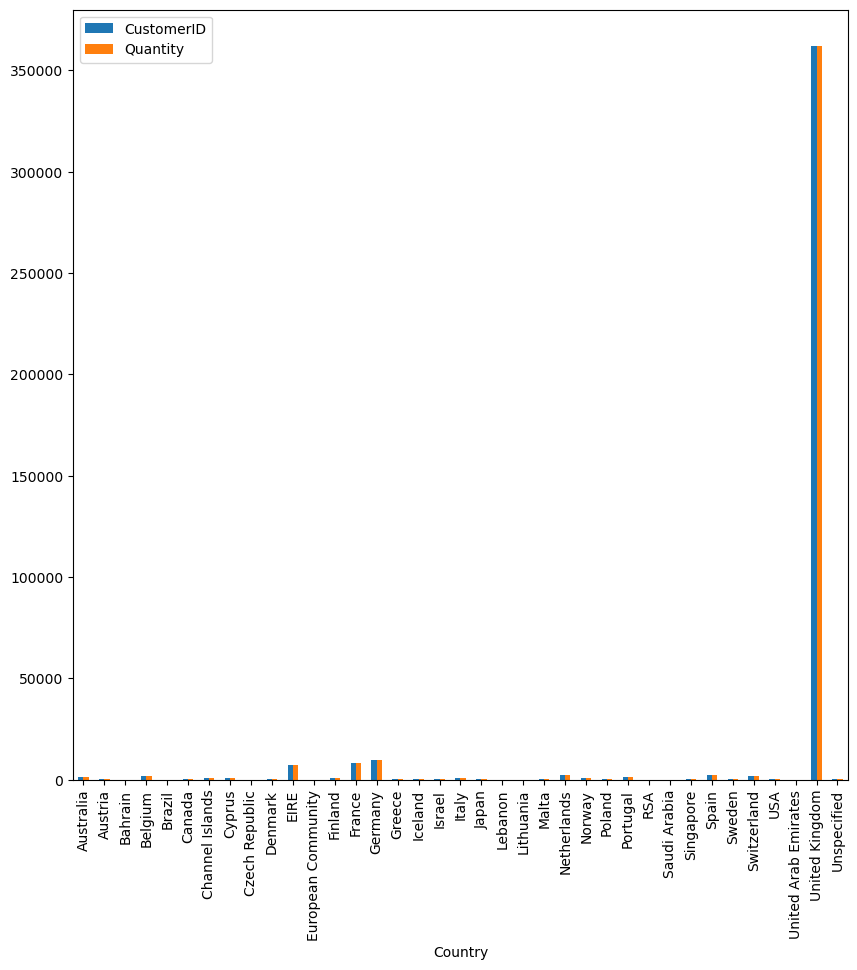

In [28]:
# Country wise plotting
df[["CustomerID", "Quantity", "Country"]].groupby("Country").count().plot(kind='bar', figsize=(10,10))


<AxesSubplot:xlabel='Invoice_month'>

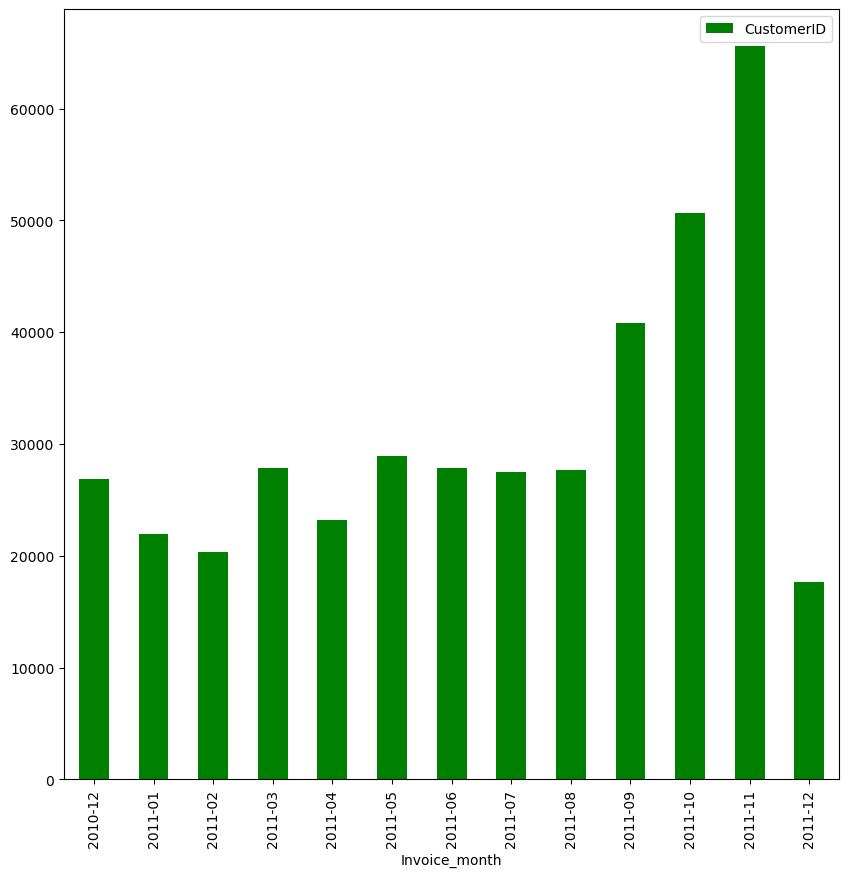

In [29]:
df["Invoice_month"] = df['InvoiceDate'].dt.year.astype('str') + "-" + df['InvoiceDate'].dt.month.astype('str').apply(lambda x: '{0:0>2}'.format(x)).str.split('.').str[0]
df[["CustomerID", "Invoice_month"]].groupby("Invoice_month").count().plot(kind='bar', color='g', figsize=(10,10))

# Cohort Analysis 

In [30]:
# Cohort Analysis :  a.	Create month cohorts and analyse active  customers for each cohort
customerGroup = df.groupby("CustomerID")
df['Cohort_Date'] = customerGroup["InvoiceDate"].transform('min')
df["Cohort_month"] = df['Cohort_Date'].dt.month
df["Cohort_year"] = df['Cohort_Date'].dt.year
df["Cohort_year_month"] = df['Cohort_Date'].dt.year.astype('str').str.split('.').str[0] + "-" + df['Cohort_month'].astype('str').apply(lambda x: '{0:0>2}'.format(x)).str.split('.').str[0] 
df["Invoice_year_month"] = df["InvoiceDate"].dt.year.astype('str').str.split('.').str[0] + "-" + df['InvoiceDate'].dt.month.astype('str').apply(lambda x: '{0:0>2}'.format(x)).str.split('.').str[0] 


year_diff = df["InvoiceDate"].dt.year - df["Cohort_year"]
month_diff = df["InvoiceDate"].dt.month - df["Cohort_month"] 

df["Cohort_month_index"] = year_diff * 12 + month_diff + 1

In [31]:
# verify data of specific CustomerID, groupby results
df[df["CustomerID"] == 17850.0].sort_values(by="InvoiceDate")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Cohort_Date,Cohort_month,Cohort_year,Cohort_year_month,Invoice_year_month,Cohort_month_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,2010-12-01 08:26:00,12,2010,2010-12,2010-12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12-01 08:26:00,12,2010,2010-12,2010-12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,2010-12-01 08:26:00,12,2010,2010-12,2010-12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12-01 08:26:00,12,2010,2010-12,2010-12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12-01 08:26:00,12,2010,2010-12,2010-12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86890,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom,2011-02,2010-12-01 08:26:00,12,2010,2010-12,2011-02,3
86889,C543611,22632,HAND WARMER RED RETROSPOT,-6,2011-02-10 14:38:00,1.85,17850,United Kingdom,2011-02,2010-12-01 08:26:00,12,2010,2010-12,2011-02,3
86888,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom,2011-02,2010-12-01 08:26:00,12,2010,2010-12,2011-02,3
86894,C543611,21730,GLASS STAR FROSTED T-LIGHT HOLDER,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom,2011-02,2010-12-01 08:26:00,12,2010,2010-12,2011-02,3


In [32]:
# cohort grouping 
cohortGroup = df.groupby(['Cohort_year_month','Cohort_month_index']) 
cohortGroup.head()
gp_cust = cohortGroup["CustomerID"].apply(pd.Series.nunique)
gp_cust = gp_cust.reset_index()

In [33]:
gp_cust["Cohort_month_index"] = gp_cust["Cohort_month_index"].astype(np.int64)

In [34]:
# From how many months each customer is active  
gp_cust

,Cohort_year_month,Cohort_month_index,CustomerID
0,2010-12,1,948
1,2010-12,2,362
2,2010-12,3,317
3,2010-12,4,367
4,2010-12,5,341
...,...,...,...
86,2011-10,2,93
87,2011-10,3,46
88,2011-11,1,321
89,2011-11,2,43


In [35]:
pivot_df = gp_cust.pivot(index = ['Cohort_year_month'], columns="Cohort_month_index", values="CustomerID")
pivot_df

Cohort_month_index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_year_month,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Commenting on Cohorot results in above step

# Customers entered in 2010-12 and purchased during same month
cohort_11 = df[(df["InvoiceDate"] >= '2010-12-01 00:00:00') & (df["InvoiceDate"] < '2010-12-31 00:00:00')]["CustomerID"].nunique()

# Customers enrolled to website in 2010-12 and purchased till next month (cohort index=2)
cohort_21 = df[(df["Cohort_year_month"] == '2010-12')& (df["Invoice_year_month"] == '2011-01') ]["CustomerID"].nunique()

# Customers enrolled to website in 2010-12 and purchased till next 3 months (cohort index=3)
cohort_31 = df[(df["Cohort_year_month"] == '2010-12')& (df["Invoice_year_month"] == '2011-02') ]["CustomerID"].nunique()


# Customers enrolled to website in 2010-12 and purchased till next month (cohort index=2)
cohort_22 = df[(df["Cohort_year_month"] == '2011-01')& (df["Invoice_year_month"] == '2011-01') ]["CustomerID"].nunique()

# Customers enrolled to website in 2010-12 and purchased till next 3 months (cohort index=3)
cohort_32 = df[(df["Cohort_year_month"] == '2011-01')& (df["Invoice_year_month"] == '2011-02') ]["CustomerID"].nunique()

print("Cohort Index of 2010-12 : {0}, {1}, {2}".format(cohort_11, cohort_21, cohort_31))

print("Cohort Index of 2011-01 : {0}, {1}".format(cohort_22, cohort_32))

Cohort Index of 2010-12 : 948, 362, 317
Cohort Index of 2011-01 : 421, 101


In [37]:
pivot_df = pivot_df.divide(pivot_df.iloc[:,0], axis=0)

In [38]:

# retention Rate in % 
pivot_df.round(4)*100


# Comments : 38% of Customers enrolled/joined in website 2010-12 and are retained in 2011-01
# 33% of Customers enrolled/joined in website 2010-12 and are retained in 2011-02
# 23% of Customers enrolled/joined in website 2011-01 and are retained in 2011-02 and so on.. 

Cohort_month_index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_year_month,,,,,,,,,,,,,
2010-12,100.0,38.19,33.44,38.71,35.97,39.66,37.97,35.44,35.44,39.45,37.34,50.00,27.43
2011-01,100.0,23.99,28.27,24.23,32.78,29.93,26.13,25.65,31.12,34.68,36.82,14.96,NaN
2011-02,100.0,24.74,19.21,27.89,26.84,24.74,25.53,28.16,25.79,31.32,9.21,NaN,NaN
2011-03,100.0,19.09,25.45,21.82,23.18,17.73,26.36,23.86,28.86,8.86,NaN,NaN,NaN
2011-04,100.0,22.74,22.07,21.07,20.74,23.75,23.08,26.09,8.36,NaN,NaN,NaN,NaN
2011-05,100.0,23.66,17.20,17.20,21.51,24.37,26.52,10.39,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,20.85,18.72,27.23,24.68,33.62,10.21,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,20.94,20.42,23.04,27.23,11.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,25.15,25.15,25.15,13.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# RFM Analysis

In [39]:
# RFM stands for RECENCY, Frequency, and Monetary


In [40]:
# RECENCY: How recently did the customer visit website 
df_recency = df.groupby("CustomerID", as_index=False)["InvoiceDate"].max()

df_recency.columns = ['CustomerID','max_purchased_date']
df_recency["ReferenceDate"] = pd.to_datetime(max_date)
df_recency['Missed_Customer_Days'] = (df_recency["ReferenceDate"] - df_recency['max_purchased_date']).dt.days

In [41]:
df_recency.drop(['ReferenceDate', 'max_purchased_date'], axis=1, inplace=True)

In [42]:
df_recency.head()

,CustomerID,Missed_Customer_Days
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309


<AxesSubplot:xlabel='Missed_Customer_Days'>

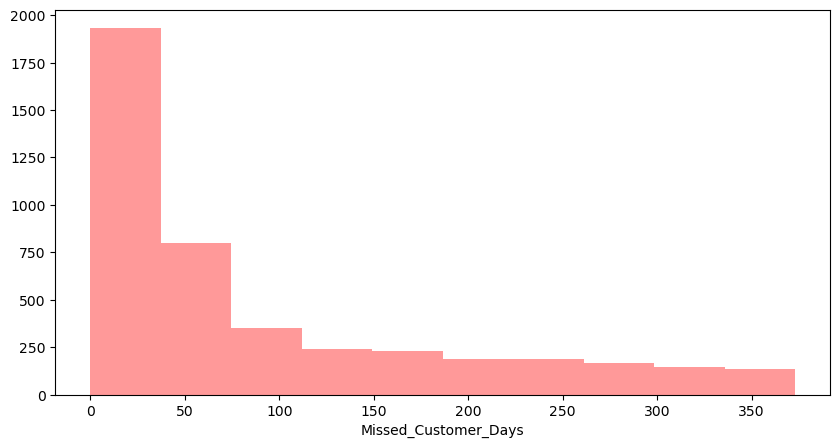

In [43]:

plt.figure(figsize=(10,5))
sns.distplot(df_recency['Missed_Customer_Days'], bins=10, kde=False, color='r')

# it is a good sign that majority of customers are visiting site recently

In [44]:
df_frequency = df.groupby('CustomerID', as_index=False)['InvoiceDate'].nunique()

df_frequency.rename(columns={'InvoiceDate': 'Frequency'}, inplace=True)
max_frequency = df_frequency['Frequency'].max()
min_frequency = df_frequency['Frequency'].min()
print("max_frequency: {0} and min_frequency {1}".format(max_frequency ,min_frequency))
df_frequency.head()

max_frequency: 248 and min_frequency 1


,CustomerID,Frequency
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [45]:
# wondering who is most frequent customer 

# Top 3 frequent customers
df_frequency.sort_values(by='Frequency', ascending=False).head(3)

,CustomerID,Frequency
1895,14911,248
330,12748,225
4042,17841,168


<AxesSubplot:xlabel='Frequency'>

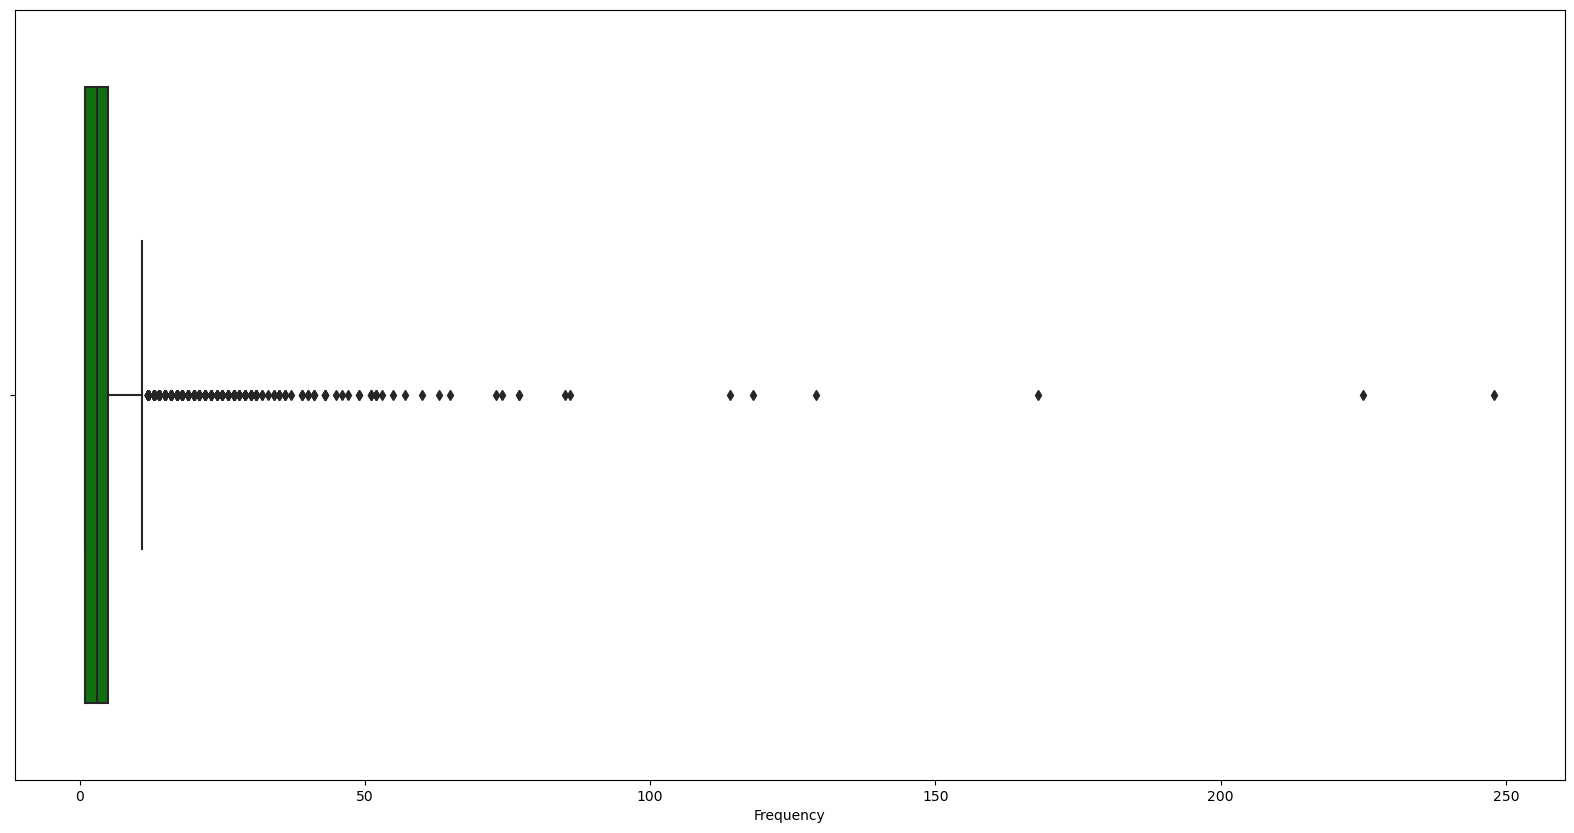

In [46]:
# look for boxplot outliers
plt.figure(figsize=(20,10))
sns.boxplot(df_frequency['Frequency'], color='g')

In [47]:
# Analysis on most frequent customerID # 14911 
# purchased 1794 unique stocks across time frame
df[df["CustomerID"] == 14911.0]["StockCode"].value_counts()

C2        85
22423     56
22699     36
22197     35
85123A    34
          ..
22803      1
21163      1
22709      1
21059      1
79302M     1
Name: StockCode, Length: 1794, dtype: int64

<AxesSubplot:xlabel='Invoice_month'>

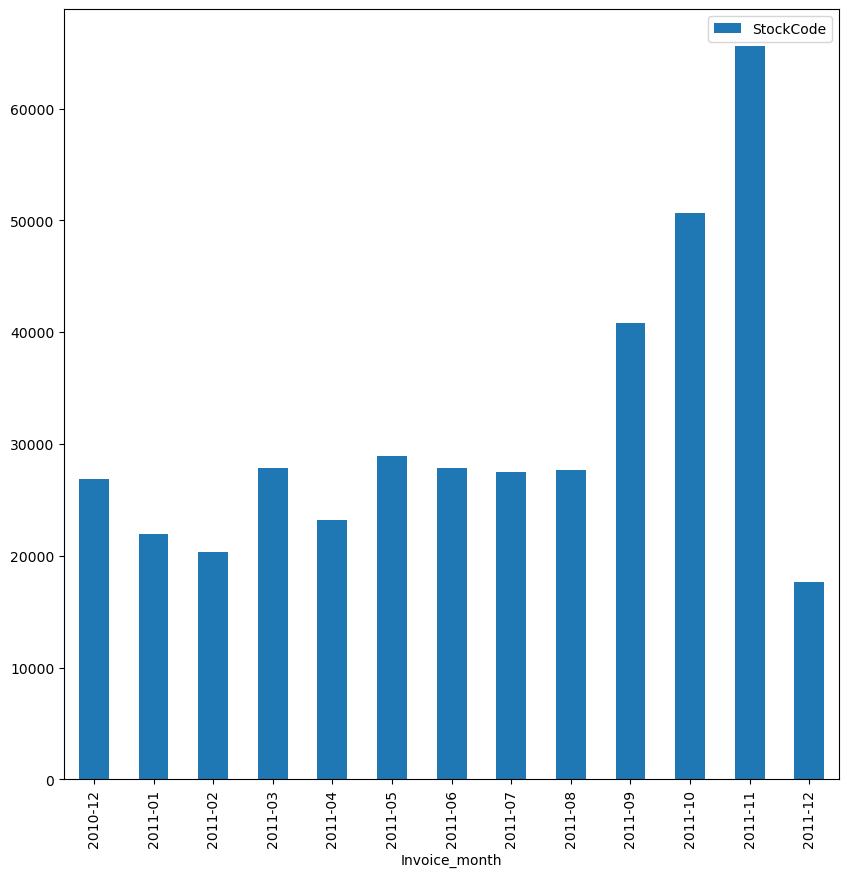

In [48]:
# check monthly view of the specific customer
df[["StockCode","Invoice_month"]].groupby("Invoice_month").count().plot(kind='bar', figsize=(10,10))

In [49]:

# Monetary
df["Total_Quantity"] = df["UnitPrice"] * df["Quantity"]

# Negative Quantity doesn't mean customer generated revenue loss but it means customers purchased and cancelled transaction.
# this should not be summed up while generating monetary results, hence adjusting to 0
df["Total_Quantity"] = df["Total_Quantity"].apply(lambda x: x if x >=0 else 0)
df_monetary = df.groupby("CustomerID", as_index=False)["Total_Quantity"].sum()
df_monetary.sort_values(by="Total_Quantity",ascending=False)

,CustomerID,Total_Quantity
1703,14646,280206.02
4233,18102,259657.30
3758,17450,194550.79
3033,16446,168472.50
1895,14911,143825.06
...,...,...
3828,17547,0.00
2400,15590,0.00
2745,16061,0.00
3756,17448,0.00


In [50]:
df_monetary[df_monetary["CustomerID"] == 17548.0]

,CustomerID,Total_Quantity
3829,17548,103.3


<AxesSubplot:xlabel='Invoice_month'>

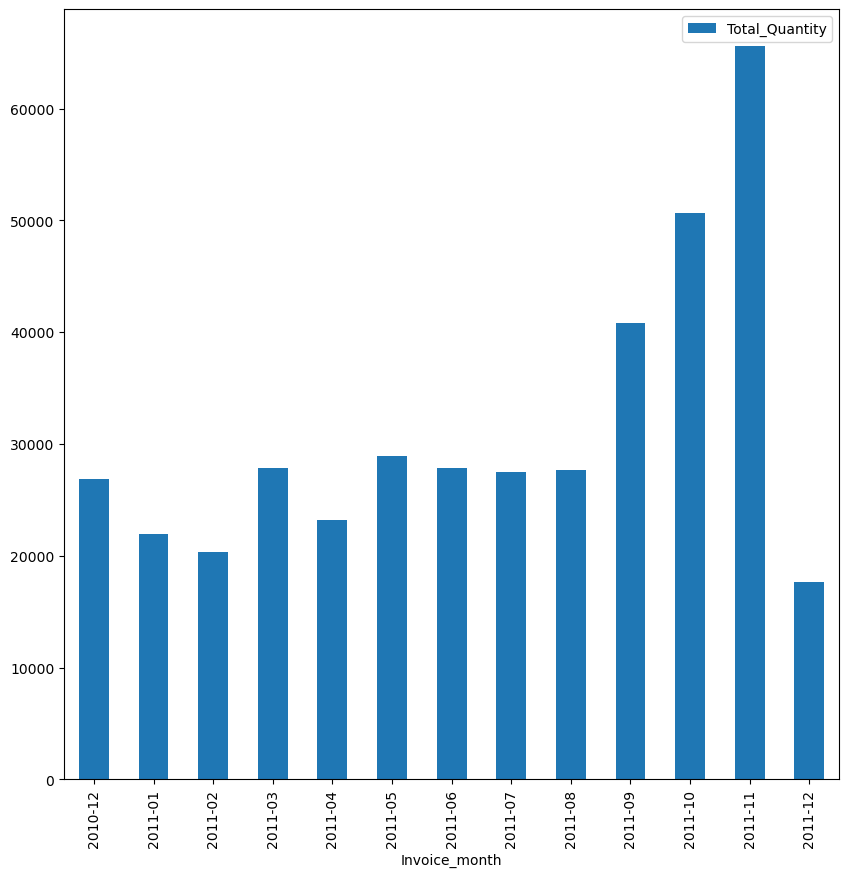

In [51]:
df[["Invoice_month", "Total_Quantity"]].groupby("Invoice_month").count().plot(kind='bar', figsize=(10,10))

#Maximum 

In [52]:
# Merge all
df_rfm = pd.merge(df_recency, df_frequency, on="CustomerID")
df_rfm = pd.merge(df_rfm, df_monetary, on="CustomerID")
df_rfm.sort_values(by="Total_Quantity", ascending=False).head(20)

,CustomerID,Missed_Customer_Days,Frequency,Total_Quantity
1703,14646,1,77,280206.02
4233,18102,0,57,259657.30
3758,17450,7,55,194550.79
3033,16446,0,3,168472.50
1895,14911,0,248,143825.06
55,12415,23,25,124914.53
1345,14156,9,65,117379.63
3801,17511,2,47,91062.38
2722,16029,38,73,81024.84
0,12346,325,2,77183.60


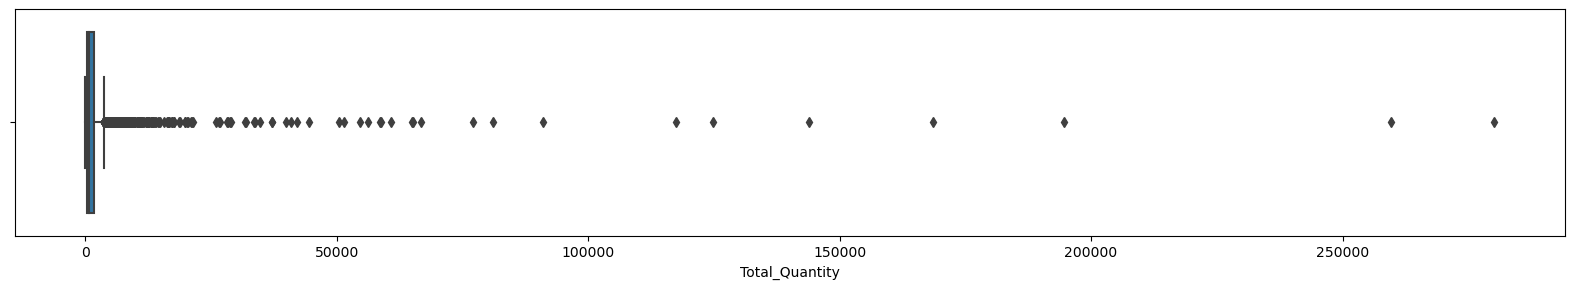

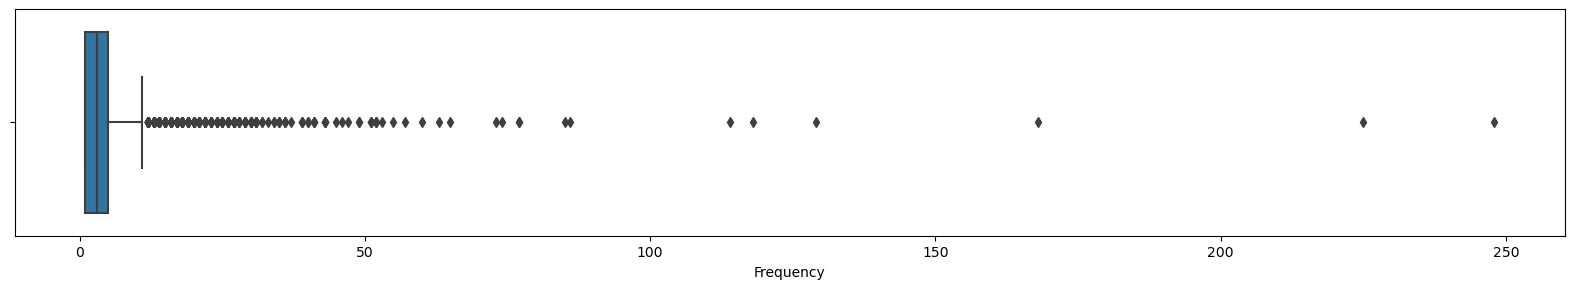

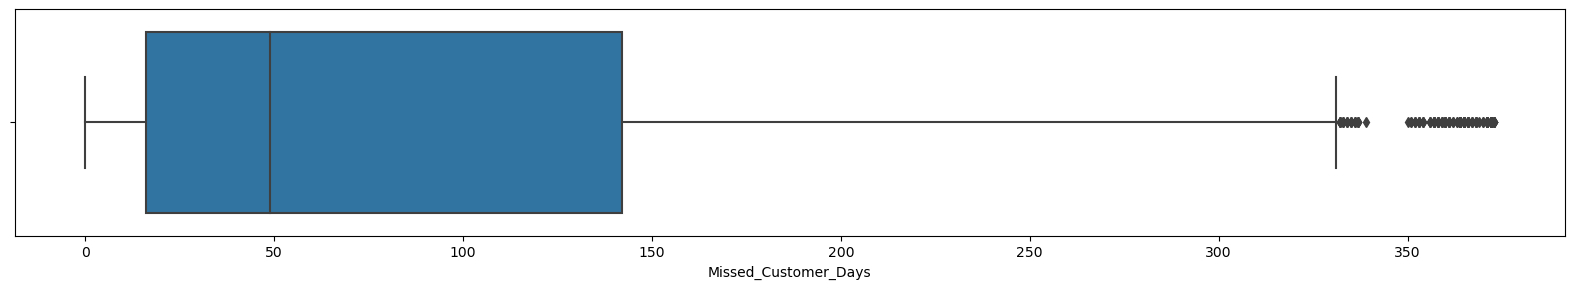

In [53]:
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
# 
sns.boxplot(df_rfm["Total_Quantity"])

plt.figure(figsize=(20,10))
plt.subplot(3,1,2)
sns.boxplot(df_rfm["Frequency"])

plt.figure(figsize=(20,10))
plt.subplot(3,1,3)
sns.boxplot(df_rfm["Missed_Customer_Days"])
plt.show()

In [54]:
# use Qcut for ranking
max_q = 3
monetary_cuts = 3
df_rfm["Monetary_Score"] = pd.qcut(df_rfm["Total_Quantity"], q= monetary_cuts, labels=range(1,monetary_cuts+1), duplicates='drop')
# # df_rfm.sort_values(by="Total_Quantity", ascending=False).head(20)
df_rfm["Frequency_Score"] = pd.qcut(df_rfm["Frequency"], q=max_q, labels= range(1,4), duplicates='drop')
df_rfm["Recency_Score"] = max_q - pd.qcut(df_rfm["Missed_Customer_Days"], q=max_q, labels=False)

In [55]:
df_rfm["RFM_Score_Rank"] = df_rfm[["Monetary_Score","Frequency_Score","Recency_Score"]].apply(lambda x: 
                                      1 if (x["Monetary_Score"] == monetary_cuts) & (x["Frequency_Score"]== max_q) & (x["Recency_Score"]==max_q)
                                      else( 2 if (x["Monetary_Score"] == monetary_cuts) & (x["Frequency_Score"]== max_q) & (x["Recency_Score"] in [2,1])
                                      else( 3 if  (x["Monetary_Score"] == monetary_cuts) & (x["Frequency_Score"] in [2,1]) & (x["Recency_Score"] in [3,2,1])
                                      else( 4 if  (x["Monetary_Score"] == monetary_cuts-1) & (x["Frequency_Score"] in [3,2,1]) & (x["Recency_Score"] in [3,2,1]) 
                                      else( 5 if  (x["Monetary_Score"] == 1) & (x["Frequency_Score"] in [3,2,1] ) & (x["Recency_Score"] in [3,2,1])
                                           else 6)))),
                                      axis=1)
df_rfm["RFM_Score_Rank_Descr"] = df_rfm["RFM_Score_Rank"].apply(lambda x: 
                                                                "Best Customers" if x==1
                                                                else ("Huge Spenders but lost few months back" if x==2
                                                                else ("Huge Spenders but not frequently purchased" if x==3
                                                                else ("Average Spenders" if x==4
                                                                else ("Least spenders" if x==5
                                                                else ("Others" 
                                                                ))))))

In [56]:
# df_rfm[df_rfm["RFM_Score_Rank"] == 6]

In [57]:
# Testing a spender
df[df["CustomerID"] == 14646.0].groupby("Invoice_month")["Total_Quantity"].sum()

Invoice_month
2010-12     8591.88
2011-01    26476.68
2011-02    22797.46
2011-03    21462.40
2011-04     2976.56
2011-05    28408.14
2011-06    25288.99
2011-07       26.02
2011-08    40327.81
2011-09    26750.70
2011-10    39995.95
2011-11    25375.41
2011-12    11728.02
Name: Total_Quantity, dtype: float64

<AxesSubplot:xlabel='RFM_Score_Rank,RFM_Score_Rank_Descr'>

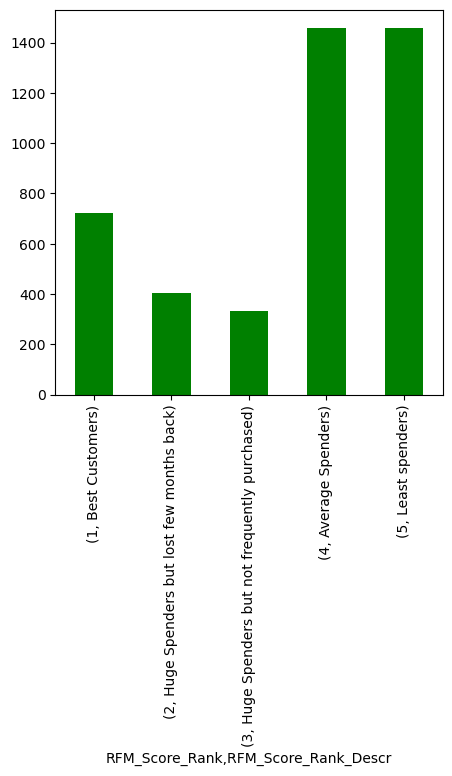

In [58]:
df_rfm.groupby(["RFM_Score_Rank", "RFM_Score_Rank_Descr"])["CustomerID"].count().plot(kind='bar', figsize=(5,5), color='g')

In [59]:
df_rfm.head()

,CustomerID,Missed_Customer_Days,Frequency,Total_Quantity,Monetary_Score,Frequency_Score,Recency_Score,RFM_Score_Rank,RFM_Score_Rank_Descr
0,12346,325,2,77183.60,3,1,1,3,Huge Spenders but not frequently purchased
1,12347,1,7,4310.00,3,3,3,1,Best Customers
2,12348,74,4,1797.24,3,2,2,3,Huge Spenders but not frequently purchased
3,12349,18,1,1757.55,3,1,3,3,Huge Spenders but not frequently purchased
4,12350,309,1,334.40,1,1,1,5,Least spenders


In [60]:
filename = "Retail_RFM_dataframe.xlsx"
df_export = df_rfm[["CustomerID","Monetary_Score","Frequency_Score", "Recency_Score", "RFM_Score_Rank", "RFM_Score_Rank_Descr"]]
df_export.to_excel(filename)

<AxesSubplot:>

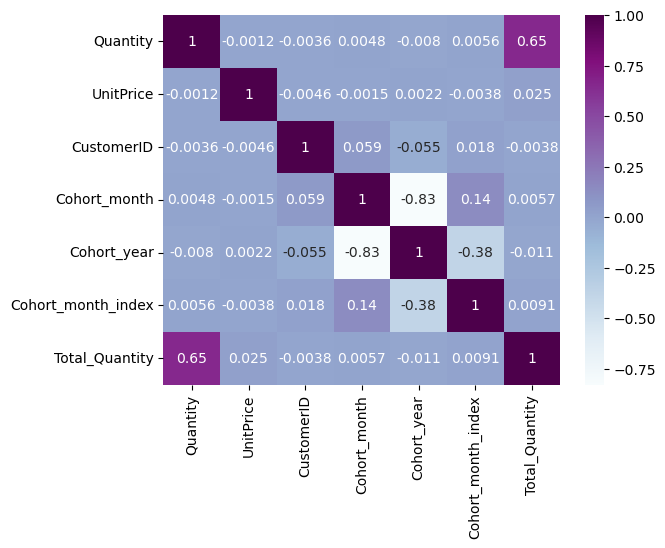

In [61]:
# correlation map

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='BuPu')

# Preprocessing steps

In [62]:
# preserve "df" object and remove duplicates into new dataframe
dataset = df_rfm[["CustomerID", "Missed_Customer_Days", "Frequency", "Total_Quantity", "RFM_Score_Rank","RFM_Score_Rank_Descr"]]
dataset = dataset.drop_duplicates()
dataset.duplicated().sum()

0

In [63]:
#Convert CustomerID to string #ID not part of calculations
dataset["CustomerID"] = dataset["CustomerID"].astype("str")
dataset["RFM_Score_Rank"] = dataset["RFM_Score_Rank"].astype("str")

In [64]:
dataset.describe()

,Missed_Customer_Days,Frequency,Total_Quantity
count,4372.000000,4372.000000,4372.000000
mean,91.047118,5.039799,2038.290920
std,100.765435,9.248607,8956.019171
min,0.000000,1.000000,0.000000
25%,16.000000,1.000000,303.602500
50%,49.000000,3.000000,665.315000
75%,142.000000,5.000000,1652.790000
max,373.000000,248.000000,280206.020000


# outliers

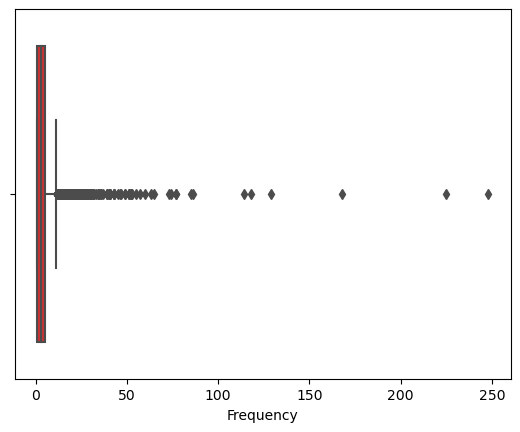

In [65]:
# remove outliers before algorithm
sns.boxplot(dataset['Frequency'], palette="Set1")
# len(dataset[dataset['Frequency'] > 50])
dataset.drop(dataset.loc[dataset['Frequency'] > 60].index, axis=0, inplace=True)

In [66]:
len(dataset[dataset['Frequency'] > 60])

0

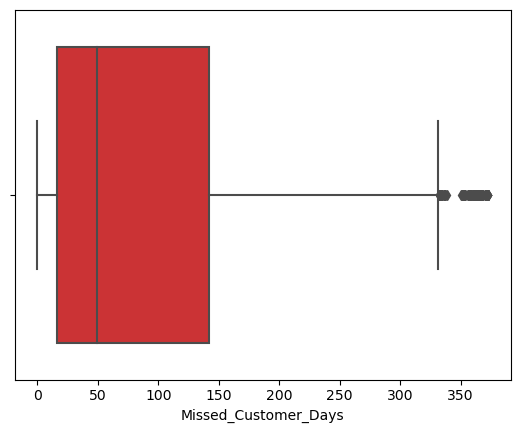

In [67]:
sns.boxplot(dataset['Missed_Customer_Days'], palette="Set1")
len(dataset[dataset['Missed_Customer_Days'] > 365])
dataset.drop(dataset.loc[dataset['Missed_Customer_Days'] > 365].index, axis=0, inplace=True)

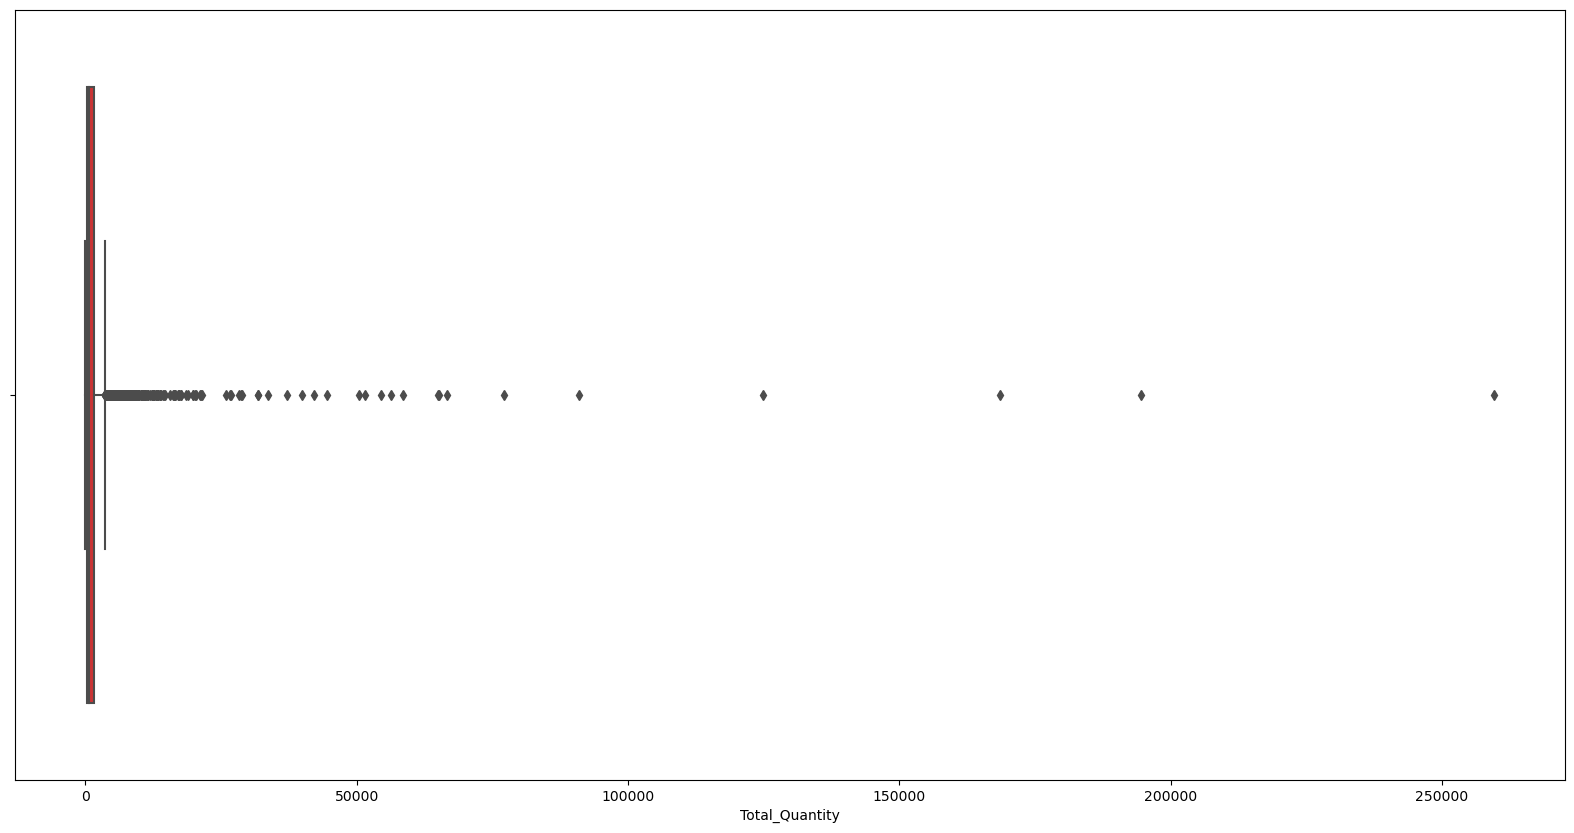

In [68]:
plt.figure(figsize=(20,10))
sns.boxplot(dataset['Total_Quantity'], palette="Set1")
plt.show()
# Unable to detect outliers using boxplot method

In [69]:
# IQR range for detecting outliers
Q1_IQR = dataset['Total_Quantity'].quantile(0.05)
Q3_IQR = dataset['Total_Quantity'].quantile(0.95)

IQR = Q3_IQR - Q1_IQR
# Negative end is already trimmed
dataset.drop(dataset.loc[dataset['Total_Quantity'] > Q3_IQR + 1.5*IQR ].index, axis=0, inplace=True)

In [70]:
len(dataset) #4302

4249

<AxesSubplot:xlabel='Total_Quantity', ylabel='Density'>

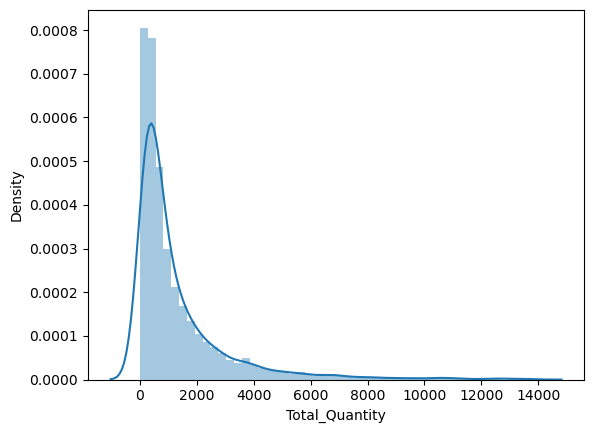

In [71]:
sns.distplot(dataset['Total_Quantity'])

# Scaling & Transformations

# Applied scaling but it is not effective in improving silhoutte score, hence removed code

In [72]:
# df_num = dataset.select_dtypes(include=['int64', 'float64'])
# df_cat = dataset.select_dtypes(exclude=['int64', 'float64'])
# # mn = MinMaxScaler()
# # df_sc = mn.fit_transform(df_num)

In [73]:
# df_sc_df = pd.DataFrame(df_sc, columns = df_num.columns)

# df_sc_df = np.sqrt(df_sc_df)

# df_sc_df.reset_index(drop=True, inplace=True)
# df_cat.reset_index(drop=True, inplace=True) 

# df_merged = pd.concat([df_sc_df, df_cat], axis=1)
# df_merged.head()


#? CustomerID shouldn't be float
# Cancelled shouldnt be float
# Why country NAN after merged df - interview question - because of reset_index

In [74]:
dataset.head()

,CustomerID,Missed_Customer_Days,Frequency,Total_Quantity,RFM_Score_Rank,RFM_Score_Rank_Descr
1,12347,1,7,4310.00,1,Best Customers
2,12348,74,4,1797.24,3,Huge Spenders but not frequently purchased
3,12349,18,1,1757.55,3,Huge Spenders but not frequently purchased
4,12350,309,1,334.40,5,Least spenders
5,12352,35,11,2506.04,2,Huge Spenders but lost few months back


In [75]:
# df_merged[df_merged["CustomerID"] == "12347"]

In [76]:
X = dataset[["Missed_Customer_Days","Frequency","Total_Quantity"]]
X.head()

,Missed_Customer_Days,Frequency,Total_Quantity
1,1,7,4310.00
2,74,4,1797.24
3,18,1,1757.55
4,309,1,334.40
5,35,11,2506.04


# KMeans

[]

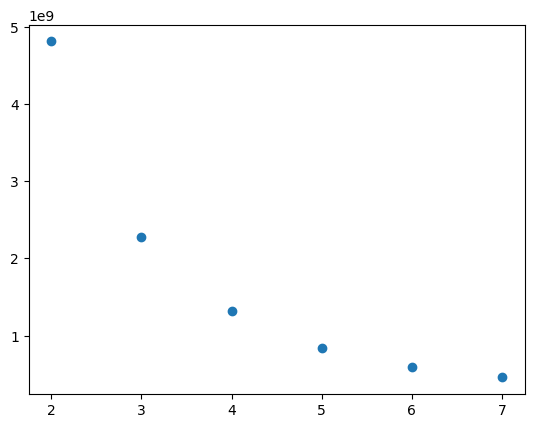

In [77]:
# #Elbow method

elbow = range(2, 8)
sse = []
for e in elbow:
    km = KMeans(n_clusters = e, random_state=33)
    km.fit(X)
    sse.append(km.inertia_)
plt.scatter(elbow, sse)
plt.plot(figsize=(20,20)) 

In [78]:
df_cost = pd.DataFrame({"Cluster": elbow, "Cost": sse}) 
filename = "Retail_KmeansCost.xlsx"
df_cost.to_excel(filename)

In [79]:
km = KMeans(n_clusters=5) # 
km.fit_transform(X)
km.labels_

array([3, 0, 0, ..., 2, 0, 0])

In [80]:
# delete cluster if exists
dataset.drop("Cluster", axis=1, inplace=True, errors='ignore')
dataset.insert(0, "Cluster", km.labels_, True)
# df_merged.drop("Cluster", axis=1)
dataset.head()

,Cluster,CustomerID,Missed_Customer_Days,Frequency,Total_Quantity,RFM_Score_Rank,RFM_Score_Rank_Descr
1,3,12347,1,7,4310.00,1,Best Customers
2,0,12348,74,4,1797.24,3,Huge Spenders but not frequently purchased
3,0,12349,18,1,1757.55,3,Huge Spenders but not frequently purchased
4,2,12350,309,1,334.40,5,Least spenders
5,3,12352,35,11,2506.04,2,Huge Spenders but lost few months back


In [81]:
silhouette_score(X, km.labels_)

0.6155677415026218

In [82]:
filename = "Kmean_CustomerClusters.xlsx"
df_cluster = dataset[["CustomerID","Cluster"]]
df_cluster.to_excel(filename)


<AxesSubplot:ylabel='CustomerID'>

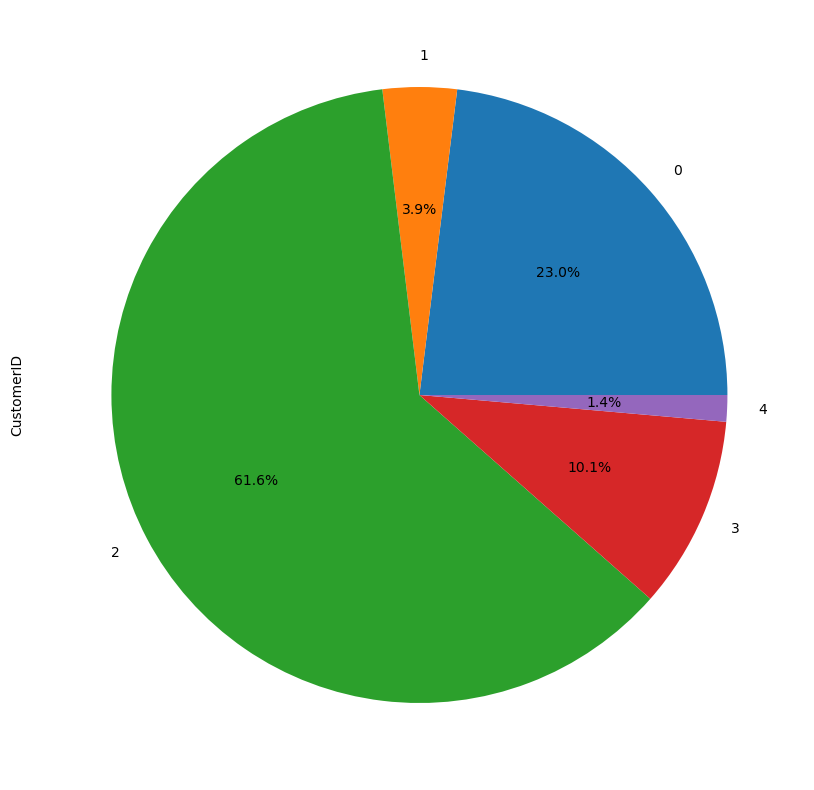

In [83]:
dataset.groupby(['Cluster'])["CustomerID"].count().plot(kind='pie',autopct='%1.1f%%',figsize=(10,10))

# Majority of customers falls in Cluster 0

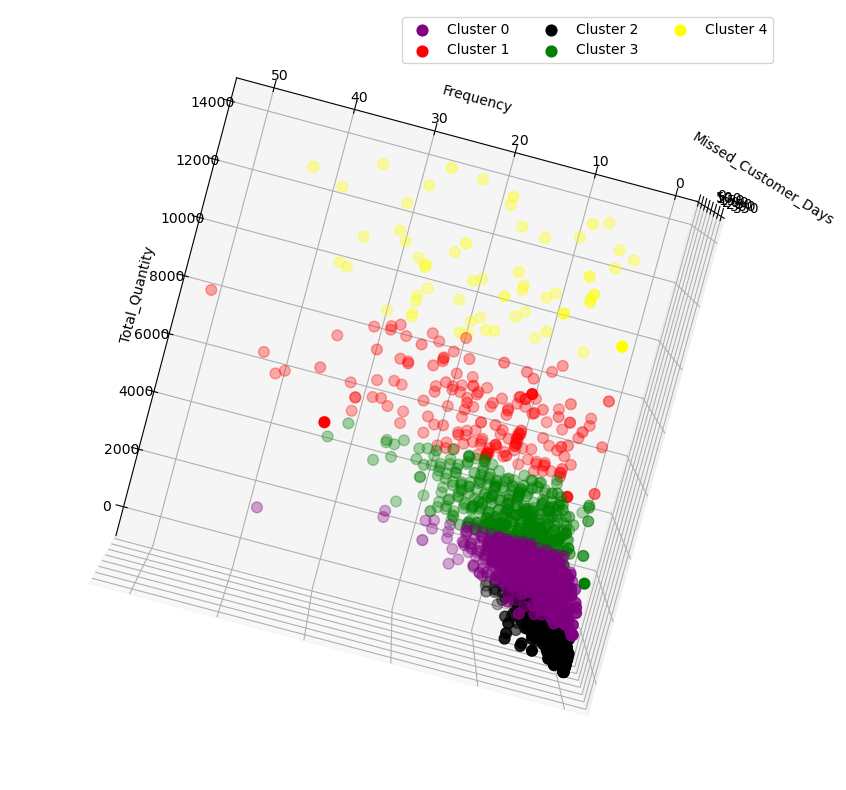

In [84]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( dataset["Total_Quantity"][dataset.Cluster == 0], dataset["Frequency"][dataset.Cluster == 0],dataset.Missed_Customer_Days[dataset.Cluster == 0],  c='purple', s=60, label="Cluster 0")
ax.scatter( dataset["Total_Quantity"][dataset.Cluster == 1], dataset["Frequency"][dataset.Cluster == 1],dataset.Missed_Customer_Days[dataset.Cluster == 1],  c='red', s=60, label="Cluster 1")
ax.scatter( dataset["Total_Quantity"][dataset.Cluster == 2], dataset["Frequency"][dataset.Cluster == 2],dataset.Missed_Customer_Days[dataset.Cluster == 2],  c='black', s=60, label="Cluster 2")
ax.scatter( dataset["Total_Quantity"][dataset.Cluster == 3], dataset["Frequency"][dataset.Cluster == 3],dataset.Missed_Customer_Days[dataset.Cluster == 3],  c='green', s=60, label="Cluster 3")
ax.scatter( dataset["Total_Quantity"][dataset.Cluster == 4], dataset["Frequency"][dataset.Cluster == 4],dataset.Missed_Customer_Days[dataset.Cluster == 4],  c='yellow', s=60, label="Cluster 4")
ax.view_init(95, 195)
plt.xlabel('Total_Quantity')
plt.ylabel("Frequency")
ax.set_zlabel("Missed_Customer_Days" )

ax.legend(ncol=3)
plt.grid(b=True)
plt.show()

<AxesSubplot:xlabel='RFM_Score_Rank_Descr,Cluster'>

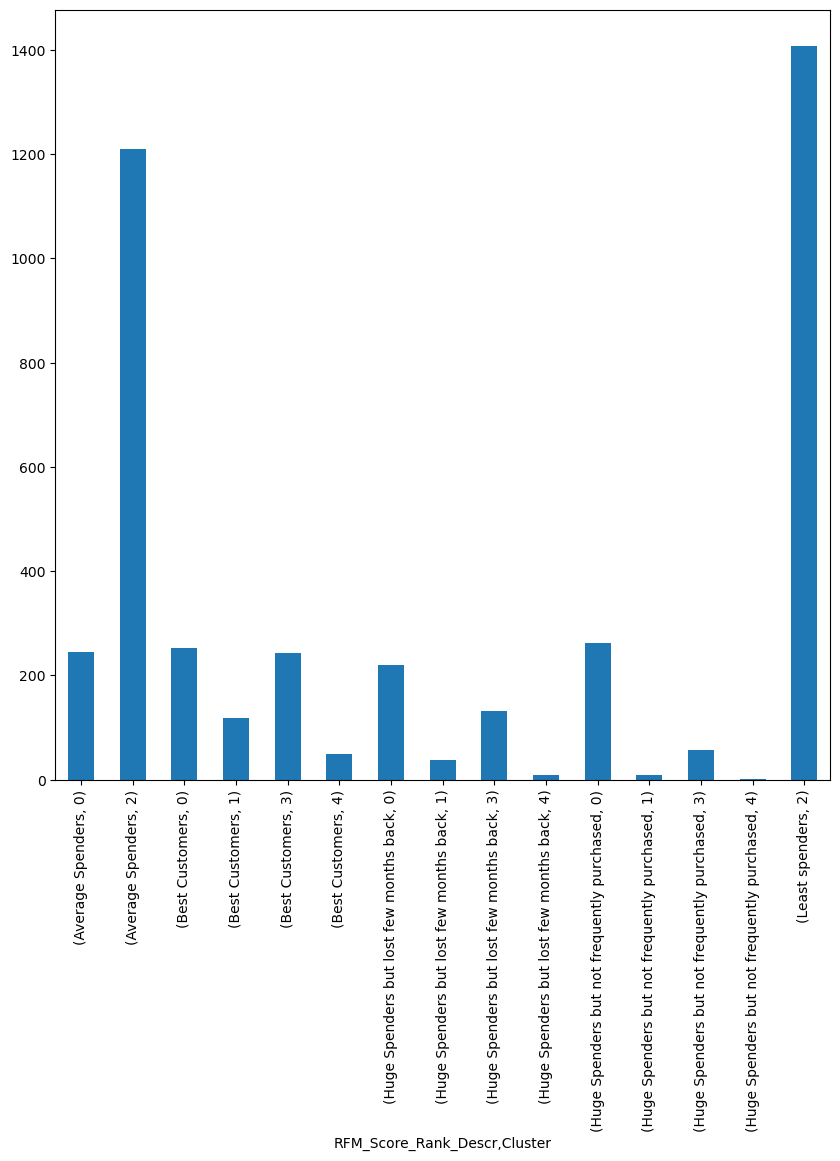

In [85]:
dataset.groupby(['RFM_Score_Rank_Descr','Cluster'])["CustomerID"].count().plot(kind='bar',figsize=(10,10))

# Majority of customers falls in Cluster 0

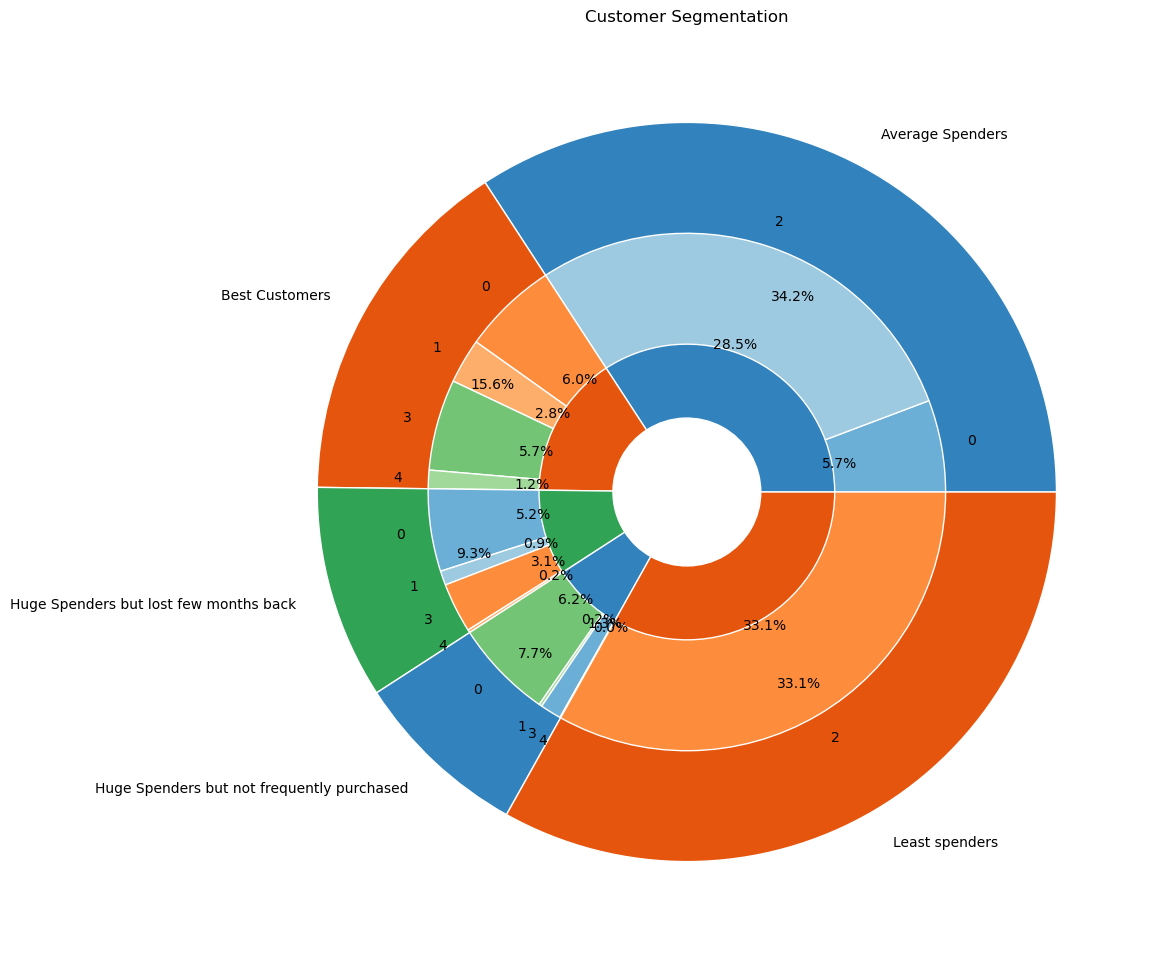

In [86]:
cmap = plt.get_cmap("tab20c")
outer = dataset.groupby('RFM_Score_Rank_Descr')["CustomerID"].count()

inner = dataset.groupby(['RFM_Score_Rank_Descr','Cluster'])["CustomerID"].count()

inner_labels = inner.index.get_level_values(1)  

outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

fig, ax = plt.subplots(figsize=(40,12))
size = 0.3

ax.pie(outer.values.flatten(), radius=1, colors=outer_colors,
       labels=outer.index,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size+0.5, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1-size, colors=inner_colors,
       labels = inner_labels,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))
# plt.legend( inner_labels, loc='upper left', bbox_to_anchor=(-0.1, 1.),
#            fontsize=8)

ax.set(aspect="equal", title='Customer Segmentation')
plt.show()

In [87]:
# Conclusions from above graphs
# Model grouped the clusters and found that Cluser 2 is having Least spending customers, Clusters 1 and 4 are having huge spenders more frequent customers and actively participating in transactions/buying more.
# Cluster 0 and Cluster 3 is moderately spending and moderate active users

# KModes model

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11343.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 10444.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 10441.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 352, cost: 9999.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 606, cost: 9661.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1053, cost: 9147.0
Run 1, iteration: 2/100, moves: 1, cost: 9147.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1044, cost: 9096.0
Run 1, iteration: 2/100, moves: 1, cost: 90

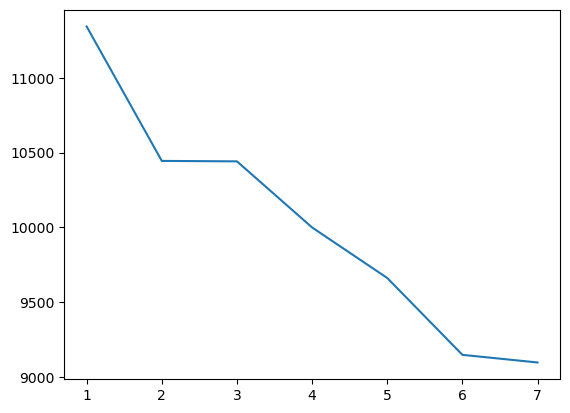

In [88]:
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    clusters = kmode.fit_predict(X)
    cost.append(kmode.cost_)

y = np.array([i for i in range(1,8,1)])
plt.plot(y,cost)


In [89]:
df_cost = pd.DataFrame({"Cluster": y, "Cost": cost})
df_cost.head(10)

,Cluster,Cost
0,1,11343.0
1,2,10444.0
2,3,10441.0
3,4,9999.0
4,5,9661.0
5,6,9147.0
6,7,9096.0


In [90]:

filename = "Retail_KModeCostVsClusters.xlsx"
df_cost.to_excel(filename)

In [91]:
# Lets decide k = 6 from elbow
kmode = KModes(n_clusters= 6, init = "Cao", n_init = 1, verbose=1)
clusters = kmode.fit_predict(X)

# delete cluster if exists
dataset.drop("Cluster", axis=1, inplace=True, errors='ignore')
dataset.insert(0, "Cluster", clusters, True)
# df_merged.drop("Cluster", axis=1)
dataset.head()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1053, cost: 9147.0
Run 1, iteration: 2/100, moves: 1, cost: 9147.0


,Cluster,CustomerID,Missed_Customer_Days,Frequency,Total_Quantity,RFM_Score_Rank,RFM_Score_Rank_Descr
1,5,12347,1,7,4310.00,1,Best Customers
2,3,12348,74,4,1797.24,3,Huge Spenders but not frequently purchased
3,0,12349,18,1,1757.55,3,Huge Spenders but not frequently purchased
4,0,12350,309,1,334.40,5,Least spenders
5,0,12352,35,11,2506.04,2,Huge Spenders but lost few months back


In [92]:
filename = "KMode_CustomerClusters.xlsx"
df_cluster = dataset[["CustomerID","Cluster"]]
df_cluster.to_excel(filename)

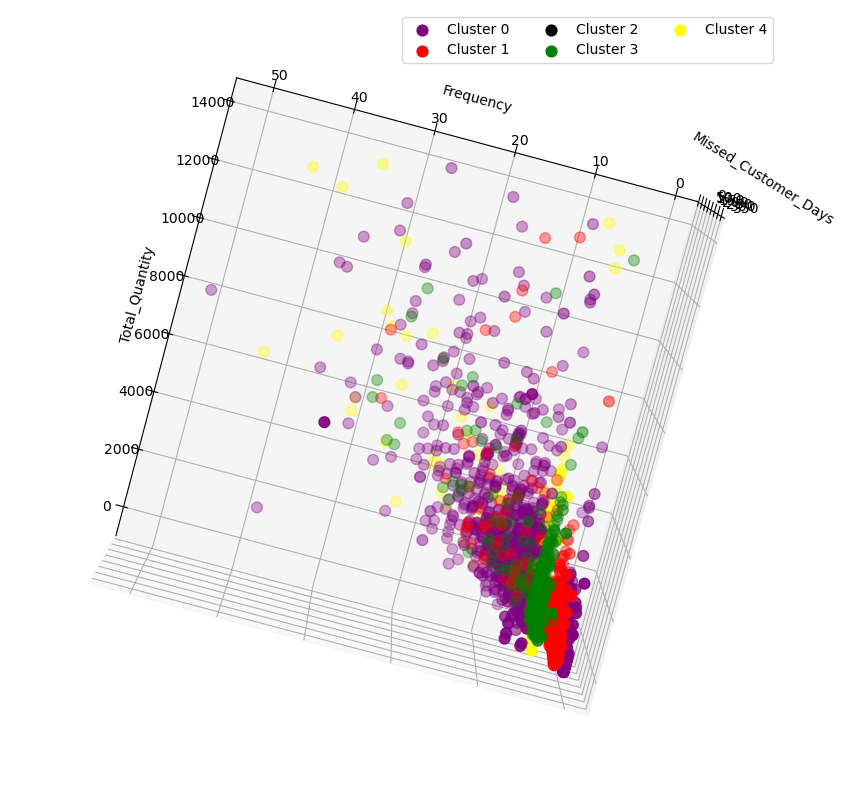

In [93]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( dataset["Total_Quantity"][dataset.Cluster == 0], dataset["Frequency"][dataset.Cluster == 0],dataset.Missed_Customer_Days[dataset.Cluster == 0],  c='purple', s=60, label="Cluster 0")
ax.scatter( dataset["Total_Quantity"][dataset.Cluster == 1], dataset["Frequency"][dataset.Cluster == 1],dataset.Missed_Customer_Days[dataset.Cluster == 1],  c='red', s=60, label="Cluster 1")
ax.scatter( dataset["Total_Quantity"][dataset.Cluster == 2], dataset["Frequency"][dataset.Cluster == 2],dataset.Missed_Customer_Days[dataset.Cluster == 2],  c='black', s=60, label="Cluster 2")
ax.scatter( dataset["Total_Quantity"][dataset.Cluster == 3], dataset["Frequency"][dataset.Cluster == 3],dataset.Missed_Customer_Days[dataset.Cluster == 3],  c='green', s=60, label="Cluster 3")
ax.scatter( dataset["Total_Quantity"][dataset.Cluster == 4], dataset["Frequency"][dataset.Cluster == 4],dataset.Missed_Customer_Days[dataset.Cluster == 4],  c='yellow', s=60, label="Cluster 4")
ax.view_init(95, 195)
plt.xlabel('Total_Quantity')
plt.ylabel("Frequency")
ax.set_zlabel("Missed_Customer_Days" )

ax.legend(ncol=3)
plt.grid(b=True)
plt.show()

In [94]:
# Conclusions
# Model grouped the clusters and found that Cluser 3 is having Least spending customers, Clusters 1 and 4 are having huge spenders more frequent customers and actively participating in transactions/buying more.
# Cluster 0 and Cluster 2 is moderately spending and moderate active users

Tableau Project 

https://public.tableau.com/views/Retail_Unsupervised_cap_Proj/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

In [95]:
# pip install pandoc